# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/2_generated/2step_transformation_dt4h_GeminiFlash"
lang = "nl"
main_path = os.path.join(main_path, lang)

# Data Exploration

## Amount of data

In [2]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [3]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r").read()

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [4]:
df.head()

,filename,text
0,31588087_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 71-jar...
1,31811112_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 67-jar...
2,29735489_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 69-jar...
3,32541524_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 4 maan...
4,30713316_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 75-jar...


In [5]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].str.split(r"\n|\s").str.len()
df.head()

,filename,text,n_char,n_words
0,31588087_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 71-jar...,2841,341
1,31811112_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 67-jar...,2165,275
2,29735489_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 69-jar...,3196,369
3,32541524_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 4 maan...,3561,409
4,30713316_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 75-jar...,2883,360


Text(0.5, 1.0, 'Number of words in clinical cases')

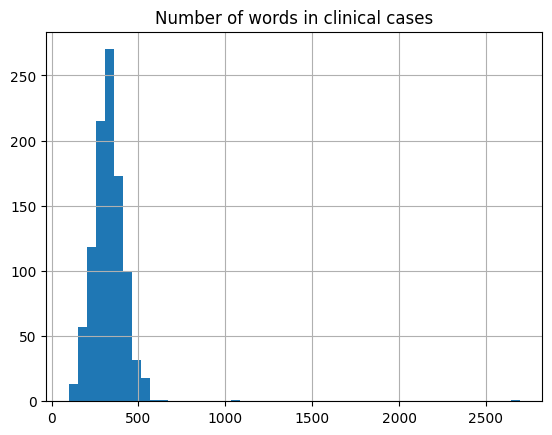

In [6]:
df["n_words"].hist(bins=50)
plt.title("Number of words in clinical cases")

In [7]:
df.describe()

,n_char,n_words
count,1000.000000,1000.000000
mean,2635.783000,327.749000
std,686.831166,113.687197
min,848.000000,98.000000
25%,2192.000000,271.000000
50%,2608.500000,322.000000
75%,3044.250000,374.250000
max,7315.000000,2694.000000


In [8]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

35089242_transformed_step2.txt
**Ontslagsamenvatting**

**Patiënt:** Een 30-jarige Japanse vrouw

**Opnamedatum:** [Opnamedatum - Niet gespecificeerd in de tekst]

**Ontslagsdatum:** [Ontslagsdatum - Niet gespecificeerd in de tekst, maar ongeveer 2 maanden na opname op basis van de tekst]

**Reden voor opname:** Leverdisfunctie, oedeemvorming van de galblaaswand en vochtretentie (zoals aangetoond door abdominale CT-scan).

**Medische voorgeschiedenis:** Geen significante voorgeschiedenis of familieanamnese. Niet-roker, niet-drinker.

**Lichamelijk onderzoek bij opname:** Lengte: 164,2 cm; Gewicht: 48,8 kg; Temperatuur: 36,0 °C; Bloeddruk: 130/60 mmHg; Hartritme: 60 bpm; Saturatie: 98%.

**Laboratoriumbevindingen bij opname:** (Zie gedetailleerde tabel met laboratoriumgegevens hieronder). Belangrijkste bevindingen waren ijzergebreksanemie, verhoogde leverenzymen (AST, ALT, ALP, LDH) en een sterk verhoogd niveau van brain natriuretic peptide (BNP) (565,9 pg/mL), suggestief voor hartfalen

# Structure exploration

Some fields are created when the report is generated. Some interesting conclusions we can extract from below are:

- Not all the generated discharge summaries have the same amount of fields.
- The fields are usually structured as \*\*Section Name:\*\* followed by the content of the section.
- The content can be structured in different ways, some of them are structured in paragraphs, others in bullet points, etc.
- Unknown content is filled with placeholders like \[Datum van Opname\] instead of making it up
- There is some correlation between the amount of fields and the length of the case because it is possible that most of them have placeholders.

In [9]:
print(df.iloc[200]["text"])

**Ontslagsamenvatting**

**Patiënt:** 68-jarige Chinese man

**Opnamedatum:** 25 december 2018

**Reden voor opname:** Duizeligheid, kortademigheid en oedeem in de onderste extremiteiten.

**Anamnese:** De patiënt presenteerde zich met klachten van duizeligheid, kortademigheid en oedeem in de onderste extremiteiten. Hij heeft een voorgeschiedenis van hartaandoeningen, gediagnosticeerd in zijn dertiger jaren, Ebstein anomalie (EA) met lage hartslag atriumfibrillatie (AF), gediagnosticeerd negen jaar eerder, waarvoor implantatie van een ventriculaire enkelkamer pacemaker (RV apex lead, initiële frequentie 60 bpm, later aangepast naar 45-55 bpm) nodig was. Hij heeft meerdere malen een ziekenhuisopname gehad voor soortgelijke symptomen en heeft eerdere aanbevelingen voor intracardiale reparatie afgewezen vanwege het waargenomen hoge chirurgische risico.

**Lichamelijk onderzoek:** Systolische hartgeruis (apicaal), oedeem in de onderste extremiteiten.

**Onderzoeken:**

* **ECG:** Pacemaker

In [10]:
# Seems like all the fields are between ** so let's extract them
df["fields"] = df["text"].str.findall(r"\*\*([^\*]+):\*\*")
df["n_fields"] = df["fields"].str.len()
df

,filename,text,n_char,n_words,fields,n_fields
0,31588087_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 71-jar...,2841,341,"[Patiënt, Opnamedatum, Ontslagsdatum, Verwijze...",13
1,31811112_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 67-jar...,2165,275,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",10
2,29735489_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 69-jar...,3196,369,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",22
3,32541524_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 4 maan...,3561,409,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",22
4,30713316_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 75-jar...,2883,360,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",16
...,...,...,...,...,...,...
995,33678543_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 74-jar...,2790,312,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",12
996,35984028_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 62-jar...,2210,264,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",9
997,35703424_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 54-jar...,2251,260,"[Patiënt, Opnamedatum, Reden voor opname, Verl...",10
998,33296609_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** Een ma...,2580,320,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",11


Text(0.5, 1.0, 'Number of fields in clinical cases')

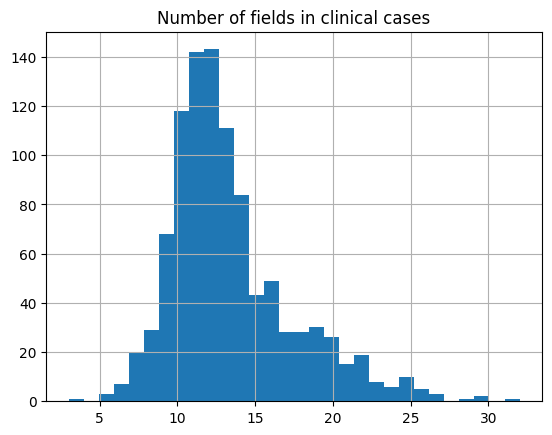

In [11]:
df["n_fields"].hist(bins=30)
plt.title("Number of fields in clinical cases")

In [12]:
df[df["n_fields"] >=50]

,filename,text,n_char,n_words,fields,n_fields


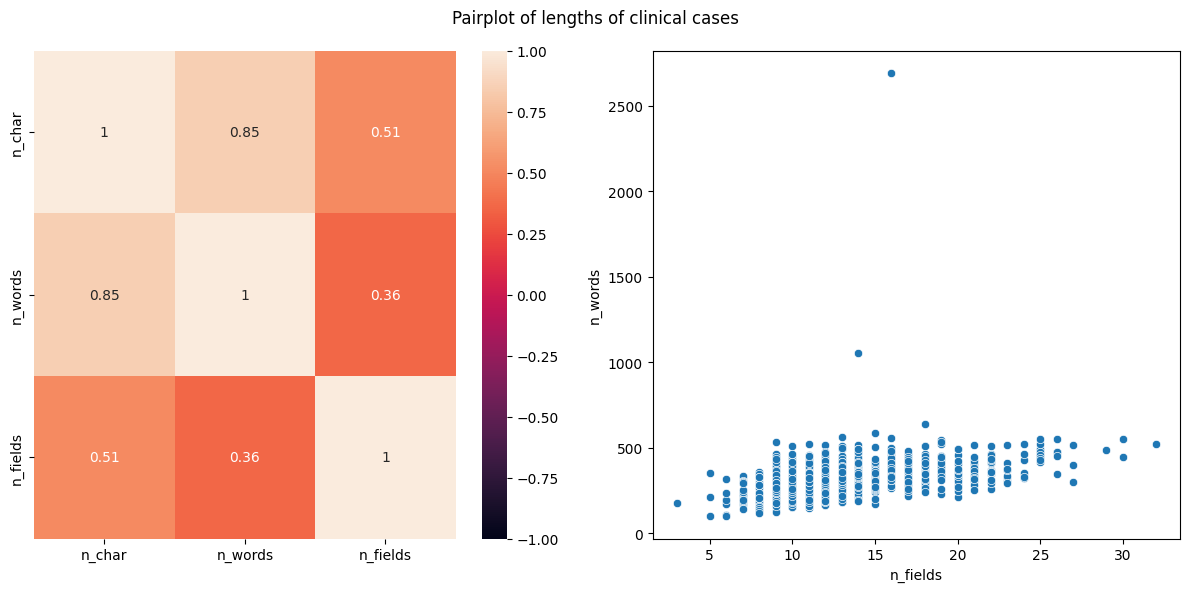

In [13]:
# Heatmap correlation matrix
import seaborn as sns
import numpy as np

cols = ["n_char", "n_words", "n_fields"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1])

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [14]:
df["placeholders"] = df["text"].str.findall(r"\[(.+)\]")
df["n_placeholders"] = df["placeholders"].str.len()
df

,filename,text,n_char,n_words,fields,n_fields,placeholders,n_placeholders
0,31588087_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 71-jar...,2841,341,"[Patiënt, Opnamedatum, Ontslagsdatum, Verwijze...",13,"[Opnamedatum, Ontslagsdatum, Verwijzende arts,...",7
1,31811112_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 67-jar...,2165,275,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",10,[Ontslagsdatum - Informatie niet verstrekt in ...,4
2,29735489_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 69-jar...,3196,369,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",22,"[Invoegen datum, Invoegen datum, Invoegen hand...",4
3,32541524_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 4 maan...,3561,409,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",22,"[Opnamedatum, Ontslagsdatum, Lijst medicijnen ...",3
4,30713316_2_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 75-jar...,2883,360,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",16,[Opnamedatum - Informatie niet verstrekt in de...,5
...,...,...,...,...,...,...,...,...
995,33678543_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 74-jar...,2790,312,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",12,[],0
996,35984028_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 62-jar...,2210,264,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",9,"[Opnamedatum - Niet vermeld in de tekst, Ontsl...",4
997,35703424_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** 54-jar...,2251,260,"[Patiënt, Opnamedatum, Reden voor opname, Verl...",10,[Datum van meest recente opname voor transplan...,1
998,33296609_transformed_step2.txt,**Ontslagsamenvatting**\n\n**Patiënt:** Een ma...,2580,320,"[Patiënt, Opnamedatum, Ontslagsdatum, Reden vo...",11,"[Opnamedatum, Ontslagsdatum, Aantal]",3


Text(0.5, 1.0, 'Number of placeholders in clinical cases')

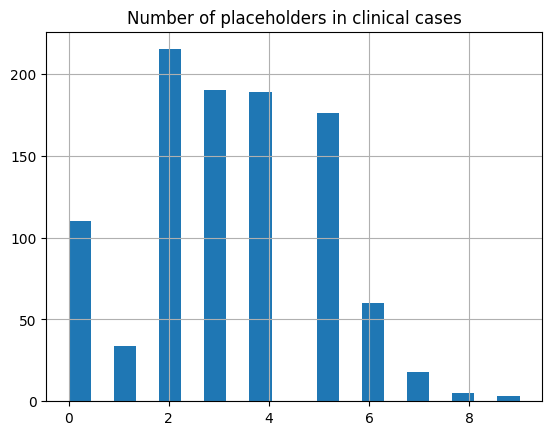

In [15]:
df["n_placeholders"].hist(bins=20)
plt.title("Number of placeholders in clinical cases")

In [16]:
df["cat_ph"] = df["n_placeholders"].apply(lambda x: "0" if x == 0 else "1-5" if x <= 5 else "6-10" if x <= 10 else ">10")

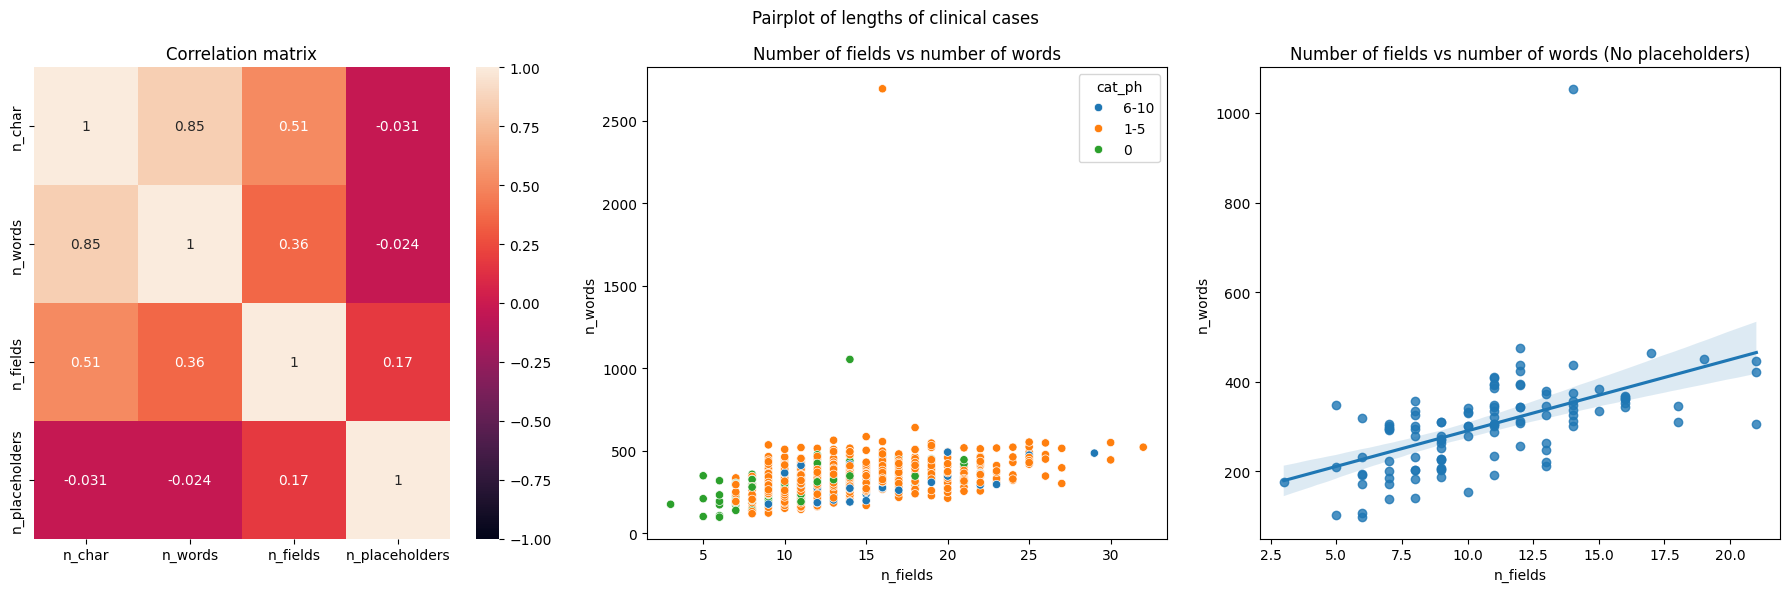

In [17]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of words")

sns.regplot(x="n_fields", y="n_words", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of words (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [18]:
df.describe()

,n_char,n_words,n_fields,n_placeholders
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2635.783000,327.749000,13.263000,3.223000
std,686.831166,113.687197,4.144998,1.802365
min,848.000000,98.000000,3.000000,0.000000
25%,2192.000000,271.000000,11.000000,2.000000
50%,2608.500000,322.000000,12.000000,3.000000
75%,3044.250000,374.250000,15.000000,5.000000
max,7315.000000,2694.000000,32.000000,9.000000
